# Lab 4 - Classification with NN

Debe formar grupo de hasta 3 personas para los laboratorios.

__Estudiante 1:__ Nombre del estudiante 1 \
__Estudiante 2:__ Nombre del estudiante 2 \
__Estudiante 3:__ Nombre del estudiante 3 

__Fecha de inicio:__ 10 de Mayo del 2023 \
__Fecha de entrega:__  18 de Mayo del 2023 (11:59 pm)

## Introduction
Has sido contratado en una empresa , superVegs,  es una empresa de cadena de suministro de productos frescos. Son pioneros en resolver uno de los problemas de la cadena de suministro más difíciles del mundo al aprovechar la tecnología innovadora. Un componente integral de su proceso de automatización es el desarrollo de clasificadores robustos que pueden distinguir entre imágenes de diferentes tipos de vegetales, mientras que también etiquetan correctamente las imágenes que no contienen ningún tipo de vegetal.

Como nuevo integrante de la empresa se nos ha encomendado la elaboración de un clasificador multiclase para la identificación de distintos tipos de vegetales. Para ello se estara usando el siguiente dataset [Kaggle Vagetable Image Dataset](https://www.kaggle.com/datasets/misrakahmed/vegetable-image-dataset)

## Instructions 
Bienvenido a tu primera semana de trabajo en la cual debes crear una aplicaciones de visión artificial! En particular, un clasificador!! 

Específicamente, se quiere:

- Analizar y preprocesar el dataset
- Implementar una serie de models clasificadores 
- Comparar una serie de modelo clasificadores de imágenes en nuevos datos
- Medir el rendimiento de los mejores modelos de clasificación en datos de prueba y en el mundo real.
- (Optional) Implementar una aplicación [Gradio](https://gradio.app/quickstart/) que se pueda ejecutar en su teléfono o laptop


## Requerimientos 
Kaggle es uno de los mejores lugares para practicar, mejorar y mostrar su habilidad de ML.

Lo más importante es que obtendremos **GPU gratis 30 horas por semana.**

Por lo tanto, se recomienda usar Kaggle Kernels para la mayoría de sus experimentos.


Su Notebook debe tener lo siguiente:

- Analizar los datos
- Cargar los datos
- Configurar varios modelos de NN
- Métricas de evaluación
- Entrenamiento y Validación
- Experimentos en imagenes Reales
- Enlace de perfil de Kaggle o a la notebook

## Imports

In [1]:
import matplotlib.pyplot as plt

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## 1. Exploratory Data Analysis¶

La mayoría de los datasets se dividen en diferentes divisiones. Por ejemplo, a menudo verá un subconjunto de datos de entrenamiento, que se usa para construir el modelo, un subconjunto de datos de validación, que se usa para medir el rendimiento del modelo mientras se entrena, y un conjunto de datos de prueba que se usa para medir el rendimiento del modelo al final del entrenamiento, y generalmente se considera qué tan bien funcionará el modelo en el mundo real.

Específicamente, usaremos el conjunto de datos de vegetales que está disponible de forma gratuita en Kaggle: https://www.kaggle.com/datasets/misrakahmed/vegetable-image-dataset

### TODO 
- Cargar las imagenes 
- Revisar el tipo de las imagenes y sus caracteristicas
- Revisar al menos una imagen por clase
- Analizar la distribucion de imagenes por clases 
- Cualquier otro analisis que desee realizar


Número de imágenes: 21000
Clases: ['test', 'train', 'validation']
Tamaño de la imagen: torch.Size([3, 224, 224])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


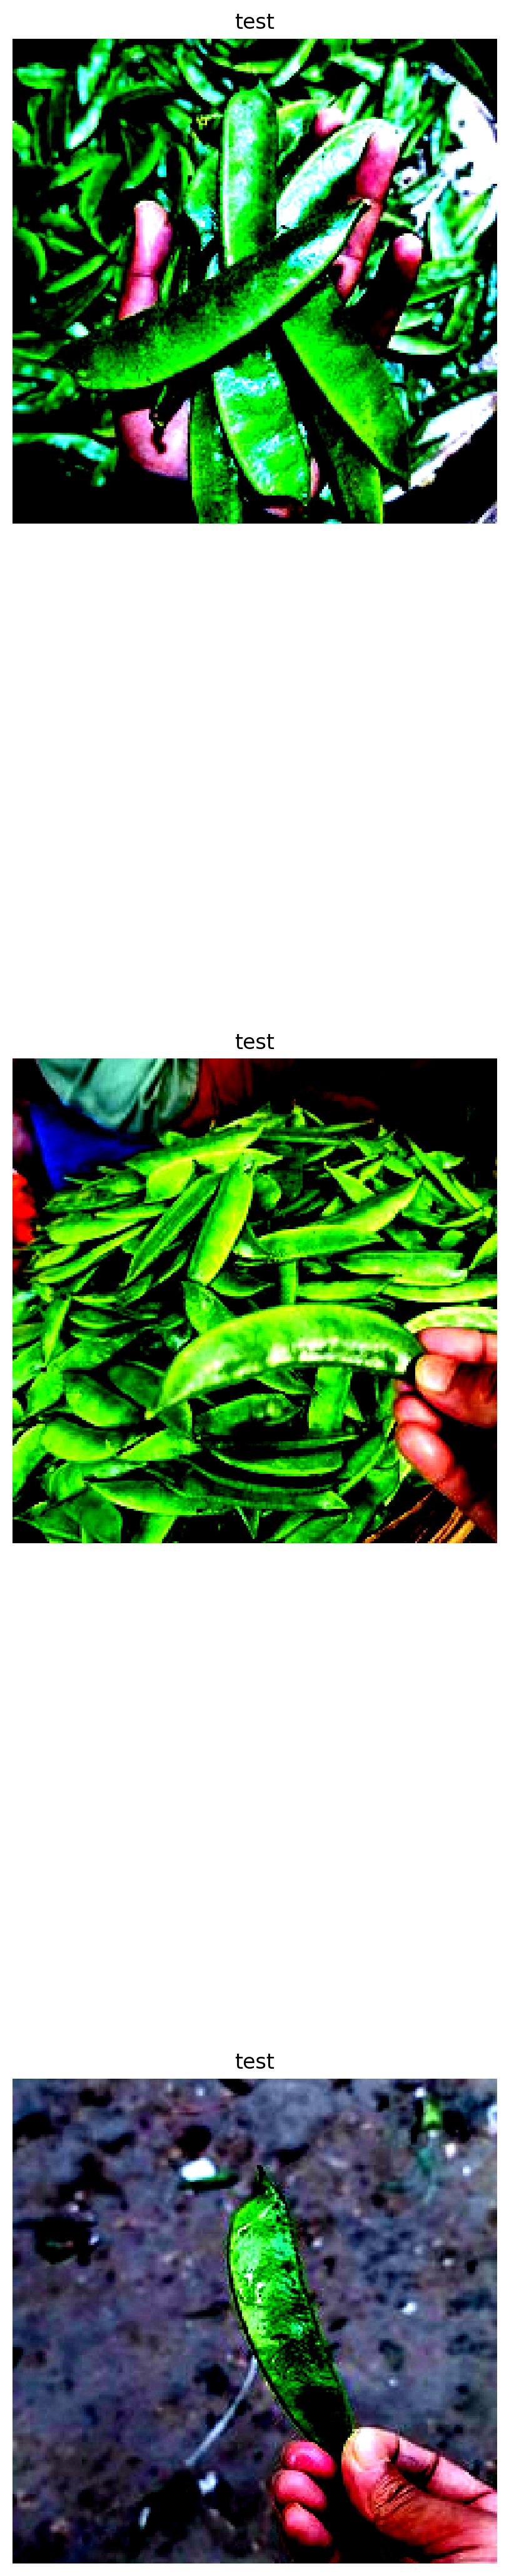

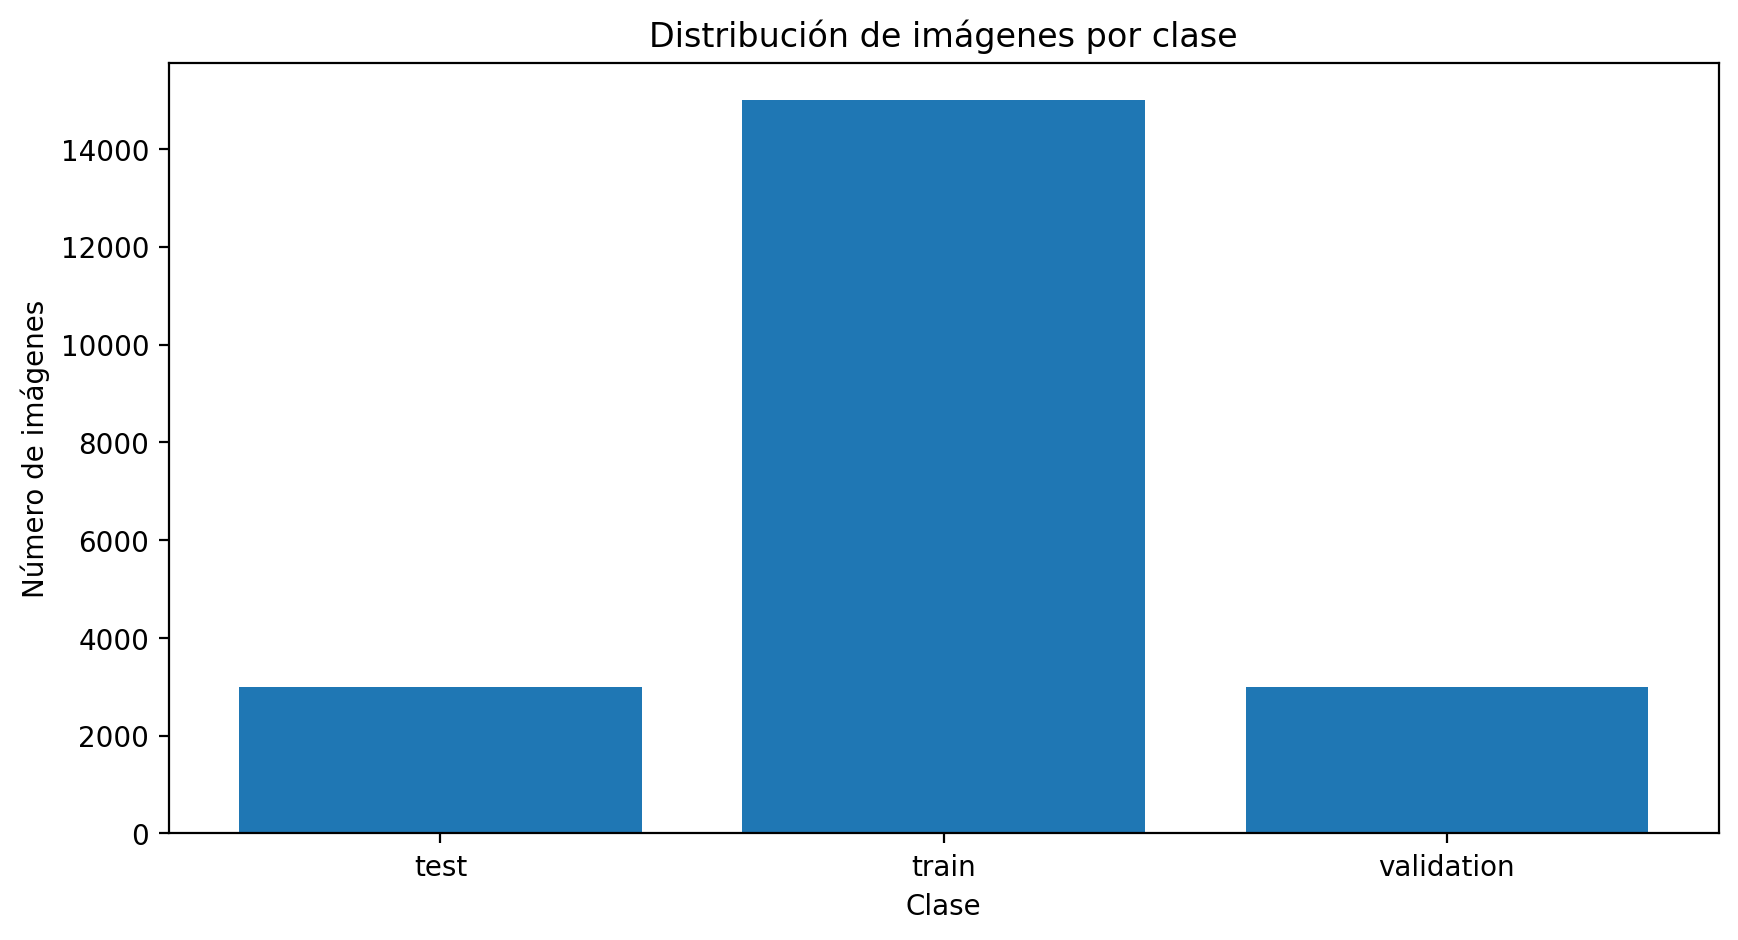

In [3]:
data_dir = './vegetable_images'

# TODO: Debe cargar las imagenes y ver que tipo de imagenes se tiene
#       Revisar una imagen por clase
#       La distribucion de las clases 
#       Cualquier otro analisis que desee realizar
# Transformaciones a aplicar a las imágenes
data_transforms = transforms.Compose([transforms.Resize(224),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])

# Cargar las imágenes
image_datasets = datasets.ImageFolder(data_dir, transform=data_transforms)

# Revisar el tipo de las imágenes y sus características
print("Número de imágenes:", len(image_datasets))
print("Clases:", image_datasets.classes)
print("Tamaño de la imagen:", image_datasets[0][0].size())

# Revisar al menos una imagen por clase
fig, axes = plt.subplots(nrows=len(image_datasets.classes), ncols=1, figsize=(5, 30))

for i, ax in enumerate(axes):
    img, label = image_datasets[i]
    ax.imshow(img.permute(1, 2, 0))
    ax.set_title(image_datasets.classes[label])
    ax.axis("off")

# Analizar la distribución de imágenes por clases
class_counts = [0] * len(image_datasets.classes)
for _, label in image_datasets:
    class_counts[label] += 1

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(image_datasets.classes, class_counts)
ax.set_xlabel("Clase")
ax.set_ylabel("Número de imágenes")
ax.set_title("Distribución de imágenes por clase")
plt.show()

## 2. Loading Dataset and Data Preprocessing

In [4]:
data_dir = './vegetable_images'

# TODO: Define transforms for the training data and testing data
train_transforms = 


test_transforms = 


train_data = 
test_data = 

trainloader = 
testloader = 

### Questions

1) ¿Qué información tenemos para cada muestra? 

    __answer__

    
2) ¿Cuántas muestras de entrenamiento tenemos? ¿Muestras de validación? ¿Muestras de prueba? 

    __answer__


3) ¿Cuántas clases diferentes hay en este conjunto de datos y cuáles son las etiquetas de clase? 

    __answer__


4) Mirando las primeras 10 imágenes de entrenamiento, ¿nota algo interesante sobre las imágenes en el conjunto de datos? ¿Son tan diversos/representativos como cabría esperar o tienen limitaciones? 

    __answer__


## 3. Simple Neural Network (MLP)
- Crear un modelo MLP
- Describir su arquitectura del modelo (Revisar ejemplo)
- Entrenar el modelo, debe probar con varios hyperparameter (learning rate, batch_size, dropout)
- Evaluar el modelo 
    - Train Accuracy vs Epochs, Val Accuracy vs Epochs
    - Train Loss vs Epochs, Val Loss vs Epochs
    - Confusion Matrix
- Guardar su modelo en una carpeta `saved_models`

## 4.  Simple CNN
- Crear un modelo CNN simple (no muy profundo)
- Describir su arquitectura del modelo (Revisar ejemplo)
- Entrenar el modelo, debe probar con varios hyperparameter (learning rate, batch_size, dropout)
- Evaluar el modelo 
    - Train Accuracy vs Epochs, Val Accuracy vs Epochs
    - Train Loss vs Epochs, Val Loss vs Epochs
    - Confusion Matrix
- Guardar su modelo en una carpeta `saved_models`

## 5. Deeper CNN Model (add more CNN and max pooling) 
- Crear un modelo Deep CNN
- Describir su arquitectura del modelo (Revisar ejemplo)
- Entrenar el modelo, debe probar con varios hyperparameter (learning rate, batch_size, dropout)
- Evaluar el modelo 
    - Train Accuracy vs Epochs, Val Accuracy vs Epochs
    - Train Loss vs Epochs, Val Loss vs Epochs
    - Confusion Matrix
- Guardar su modelo en una carpeta `saved_models`

## 6. Transfer Learning
- Crear un modelo utilizando la tecnica Transfer Learning
- Describir su arquitectura del modelo (Revisar ejemplo)
- Entrenar el modelo, debe probar con varios hyperparameter (learning rate, batch_size, dropout)
- Evaluar el modelo 
    - Train Accuracy vs Epochs, Val Accuracy vs Epochs
    - Train Loss vs Epochs, Val Loss vs Epochs
    - Confusion Matrix
- Guardar su modelo en una carpeta `saved_models`

Puede usar alguna de las siguientes opciones:
- VGG-16
- ResNet
- DenseNet

## 7. Checking Predictions with the best models 

- Seleccione sus dos mejores modelos y comparelos.
- Encuentre en que imagenes estos modelos se equivocan con frecuencia
- Evalue estos modelos usando imagenes tomadas por usted

## 8. Conclusions
Escriba sus `findings`. Es decir, un resumen de cada modelo su accuracy, loss, metodos, dificultades. 

## Question

### 1) Explique la relación entre el batchsize y el learning rate. ¿Qué es el overfitting? ¿Cómo se puede detectar y evitar el overfitting?

    __answer__

### 2) Comente la diferencia de desempeño entre los modeles y la clasificación obtenida

    __answer__
    
### 3) En que imagenes sus modelos suelen equivocarse? Por que cree que esto ocurre? Como podria mejorar lo?

    __answer__



## Deployment and test on "real" data (Optional)

La llegada del [Gradio Tutorial](https://gradio.app/quickstart/) ha facilitado mucho este proceso. Si bien aún necesitará TensorFlow o PyTorch para entrenar el modelo en sí, simplemente puede usar gradio para implementar el modelo, almacenar datos y crear una interfaz de usuario. Lo mejor de todo es que cada paso de este proceso se puede lograr con Python. ¡Puede usar esta biblioteca para crear fácilmente demos de ML!

Ejemplo de `gradio`. Cuando se introduce el nombre `Jose Jesus` en la primera entrada, la segunda muestra una salida `Hello Jose Jesus!`

```python
import gradio as gr

def greet(name):
 return "Hello " + name + "!"

demo = gr.Interface(fn=greet, inputs="text", outputs="text")
demo.launch()
```

![Text](./images/image1.png)

### Un ejemplo de imagen
Gradio admite muchos tipos de componentes, como imagen, marco de datos, video o etiqueta. ¡Probemos una función de imagen a imagen para tener una idea de esto!

```python
import numpy as np
import gradio as gr

def sepia(input_img):
    sepia_filter = np.array([
        [0.393, 0.769, 0.189], 
        [0.349, 0.686, 0.168], 
        [0.272, 0.534, 0.131]
    ])
    sepia_img = input_img.dot(sepia_filter.T)
    sepia_img /= sepia_img.max()
    return sepia_img

demo = gr.Interface(sepia, gr.Image(shape=(200, 200)), "image")
demo.launch()
```

![Text](./images/image2.png)

## Upload your demo

* **Crea una cuenta de Hugging Face y sube tu demo a Spaces**

1. Cree una cuenta gratuita de Hugging Face si aún no tiene una: https://huggingface.co/login
1. Cree un nuevo espacio **público** con el código para su aplicación Gradio. Puede encontrar útil este tutorial: https://huggingface.co/blog/gradio-spaces (Tenga en cuenta que además de cargar el código para su demostración de Gradio, también deberá cargar los archivos de modelo guardados y algunas imágenes de ejemplo, así como un archivo `requirements.txt`).
1. Una vez que se inicie su aplicación, coloque el enlace a su espacio aquí:

__answer__